# LAb5: Generalização de modelos lineares

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Dados: $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$
### Considere os dados do $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$, divididos em três conjuntos, treino/validação/teste, segundo os comandos da próxima célula.
* ### X1a: dados de treino (array de $319\times30$)
* ### y1a: classe do dados de treino
* ### X1b: dados de validação (array de $100\times30$)
* ### y1b: classe do dados de validação
* ### X2: dados de treino (array de $150\times30$)
* ### y2: classe do dados de teste

# Pergunta 1: Discriminantes logístico
##  Considere um discriminante logístico com regularização $\ell_1$ (lasso) e com os parâmetros $\texttt{C=2}$, $\texttt{solver='saga'}$ e $\texttt{max_iter=5000}$. Treine o classificador com os conjuntos de treino e validação (419 exemplos).
### a) Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### b) Imprima o índice e os nomes (feature names) das dimensões dos dados que não interferem no processo de classificação (dimensões descartadas).
### c) Calibre este classificador de maneira a ter um número máximo de falsos negativos no teste inferior o igual a 5, e ao mesmo tempo mantendo o número total de erros igual à da alínea 1.a).
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores da alínea 1.a) e 1.c).

<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve

In [2]:
D = load_breast_cancer()
X = D.data
y = D.target
fN = D.feature_names

In [7]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=150, random_state=11)
X1a, X1b, y1a, y1b = train_test_split(X1, y1, test_size=100, random_state=11)

print("Dados de Treino: ", X1a.shape, y1a.shape)
print("Dados de Validação: ", X1b.shape, y1b.shape)
print("Dados de Teste: ", X2.shape, y2.shape)

Dados de Treino:  (319, 30) (319,)
Dados de Validação:  (100, 30) (100,)
Dados de Teste:  (150, 30) (150,)


### a)

In [8]:
dl = LogisticRegression(penalty='l1', C=2, solver='saga', max_iter=5000)

dl.fit(X1a, y1a)
y2e = dl.predict(X2)

CM = confusion_matrix(y2, y2e)

print("Número de erros:", np.sum(y2 != y2e))
print(CM)

Número de erros: 8
[[45  8]
 [ 0 97]]


### b)

In [9]:
w = dl.coef_
w = w.squeeze()

print("Dimensões descartadas:", np.sum(w == 0))
print(fN[w == 0])
print(np.argwhere(w == 0).squeeze())

Dimensões descartadas: 11
['mean smoothness' 'mean symmetry' 'mean fractal dimension'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst smoothness' 'worst fractal dimension']
[ 4  8  9 14 15 16 17 18 19 24 29]


### c)

In [30]:
#Forma de arranjar o random state que possua mais de 5 falsos negativos.
#E que exista um limiar que mantenha o número de erros total e que seja possível possuir 5 ou menos falsos negativos.
listaRandomState = []

print("Hi")

for i in range(256):
    print("i: ", i)
    X1, X2, y1, y2 = train_test_split(X, y, test_size=150, random_state=i)
    X1a, X1b, y1a, y1b = train_test_split(X1, y1, test_size=100, random_state=i)
    
    dl = LogisticRegression(penalty='l1', C=2, solver='saga', max_iter=5000)

    dl.fit(X1a, y1a)
    y2e = dl.predict(X2)

    CM = confusion_matrix(y2, y2e)
    
    if CM[0, 1] > 5:
        initial01 = CM[0, 1]
        initial10 = CM[1, 0]
        y2d = dl.decision_function(X2)
        print("Erros Acima de 5")
    
        for j in np.arange(0, 1.1, 0.1):
            CM_limiar = confusion_matrix(y2, y2d > j)
            
            if np.abs(initial01 - CM_limiar[0, 1]) == np.abs(initial10 - CM_limiar[1, 0]) and CM_limiar[0, 1] <= 5:
                listaRandomState.append((i, j))
                print(listaRandomState)
                print()
    
    print()
                
print(listaRandomState)

Hi
i:  0
Erros Acima de 5

i:  1
Erros Acima de 5

i:  2
Erros Acima de 5

i:  3
Erros Acima de 5

i:  4
Erros Acima de 5

i:  5
Erros Acima de 5

i:  6
Erros Acima de 5

i:  7
Erros Acima de 5

i:  8
Erros Acima de 5

i:  9
Erros Acima de 5

i:  10
Erros Acima de 5

i:  11
Erros Acima de 5
[(11, 0.4)]

[(11, 0.4), (11, 1.0)]


i:  12
Erros Acima de 5

i:  13
Erros Acima de 5

i:  14
Erros Acima de 5

i:  15
Erros Acima de 5

i:  16
Erros Acima de 5

i:  17
Erros Acima de 5

i:  18
Erros Acima de 5

i:  19

i:  20
Erros Acima de 5

i:  21
Erros Acima de 5

i:  22
Erros Acima de 5

i:  23
Erros Acima de 5

i:  24
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4)]


i:  25
Erros Acima de 5

i:  26
Erros Acima de 5

i:  27
Erros Acima de 5

i:  28
Erros Acima de 5

i:  29
Erros Acima de 5

i:  30
Erros Acima de 5

i:  31
Erros Acima de 5

i:  32
Erros Acima de 5

i:  33
Erros Acima de 5

i:  34
Erros Acima de 5

i:  35
Erros Acima de 5

i:  36
Erros Acima de 5

i:  37
Erros Acima de 5

i:

C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



i:  53
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001)]


i:  54
Erros Acima de 5

i:  55
Erros Acima de 5

i:  56
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9)]


i:  57
Erros Acima de 5

i:  58
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9)]

[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9), (58, 1.0)]


i:  59
Erros Acima de 5

i:  60

i:  61
Erros Acima de 5

i:  62
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9), (58, 1.0), (62, 1.0)]


i:  63
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.

Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9), (58, 1.0), (62, 1.0), (63, 0.8), (63, 0.9), (63, 1.0), (83, 0.8), (102, 0.5), (102, 0.6000000000000001), (102, 0.7000000000000001), (102, 0.8), (125, 1.0), (127, 0.6000000000000001), (131, 0.9), (142, 0.5), (142, 0.6000000000000001), (142, 0.7000000000000001), (142, 0.9), (142, 1.0), (159, 0.8), (159, 0.9), (160, 0.8)]


i:  161
Erros Acima de 5

i:  162
Erros Acima de 5

i:  163
Erros Acima de 5

i:  164
Erros Acima de 5

i:  165

i:  166
Erros Acima de 5

i:  167
Erros Acima de 5

i:  168

i:  169
Erros Acima de 5

i:  170

i:  171
Erros Acima de 5

i:  172
Erros Acima de 5

i:  173
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9), (58, 1.0), (62, 1.0), (63, 0.8), (63, 0.9), (63, 1.0), (83, 0.8), (102, 0.5), (102, 0.60000000000000

C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9), (58, 1.0), (62, 1.0), (63, 0.8), (63, 0.9), (63, 1.0), (83, 0.8), (102, 0.5), (102, 0.6000000000000001), (102, 0.7000000000000001), (102, 0.8), (125, 1.0), (127, 0.6000000000000001), (131, 0.9), (142, 0.5), (142, 0.6000000000000001), (142, 0.7000000000000001), (142, 0.9), (142, 1.0), (159, 0.8), (159, 0.9), (160, 0.8), (173, 0.5), (173, 0.7000000000000001), (175, 0.4), (175, 0.5), (175, 0.6000000000000001), (184, 0.9), (184, 1.0), (188, 0.9)]


i:  189
Erros Acima de 5

i:  190
Erros Acima de 5

i:  191
Erros Acima de 5

i:  192
Erros Acima de 5

i:  193
Erros Acima de 5

i:  194
Erros Acima de 5

i:  195
Erros Acima de 5

i:  196
Erros Acima de 5

i:  197
Erros Acima de 5

i:  198
Erros Acima de 5

i:  199
Erros Acima de 5

i:  200
Erros Acima de 5

i:  201
Erros Acima de 5

i:  202
Erros Acima de 5

i:  203
Erros Acima de 5

i:  204

Erros Acima de 5

i:  225
Erros Acima de 5

i:  226
Erros Acima de 5

i:  227
Erros Acima de 5

i:  228
Erros Acima de 5

i:  229
Erros Acima de 5

i:  230
Erros Acima de 5

i:  231
Erros Acima de 5

i:  232

i:  233
Erros Acima de 5

i:  234
Erros Acima de 5

i:  235
Erros Acima de 5

i:  236
Erros Acima de 5

i:  237
Erros Acima de 5

i:  238

i:  239

i:  240
Erros Acima de 5

i:  241
Erros Acima de 5
[(11, 0.4), (11, 1.0), (24, 0.4), (39, 0.4), (39, 0.8), (46, 0.9), (46, 1.0), (50, 0.9), (53, 0.7000000000000001), (56, 0.9), (58, 0.9), (58, 1.0), (62, 1.0), (63, 0.8), (63, 0.9), (63, 1.0), (83, 0.8), (102, 0.5), (102, 0.6000000000000001), (102, 0.7000000000000001), (102, 0.8), (125, 1.0), (127, 0.6000000000000001), (131, 0.9), (142, 0.5), (142, 0.6000000000000001), (142, 0.7000000000000001), (142, 0.9), (142, 1.0), (159, 0.8), (159, 0.9), (160, 0.8), (173, 0.5), (173, 0.7000000000000001), (175, 0.4), (175, 0.5), (175, 0.6000000000000001), (184, 0.9), (184, 1.0), (188, 0.9), (207, 1.

In [19]:
#Acho que o que tem de ser mudado é o indice (0, 1)
y2d = dl.decision_function(X2)

CM_limiar = confusion_matrix(y2, y2d > 0.4)

#Ter em conta que se diminuir o indice (0, 1), tem de aumentar, no mesmo número o indice (1, 0)
print(CM_limiar)

[[48  5]
 [ 3 94]]


### d)

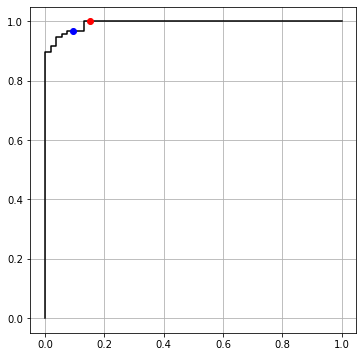

In [29]:
f, r, t = roc_curve(y2, y2d)

f1 = CM[0, 1] / (CM[0, 0] + CM[0, 1])
r1 = CM[1, 1] / (CM[1, 0] + CM[1, 1])

f2 = CM_limiar[0, 1] / (CM_limiar[0, 0] + CM_limiar[0, 1])
r2 = CM_limiar[1, 1] / (CM_limiar[1, 0] + CM_limiar[1, 1])

plt.figure(figsize=(12, 6))
plt.plot(f, r, 'k-', f1, r1, 'or', f2, r2, 'ob')
plt.axis('scaled')
plt.grid(True)

# Pergunta 2 - SVMs:
## Considere o classificador da função $\texttt{SVC}$ com os parâmetros $\texttt{kernel='rbf'}$ e $\texttt{C=2}$.
### a) Faça um pré-processamento dos dados usando a função $\texttt{StandardScaler}$. Treine esta função com os dados treino e aplique a transformação aos três conjuntos (treino, validação e teste). Use os dados pré-processados nas alíneas seguintes.
### b) Pertende-se estimar o valor do parâmetro $\texttt{gamma}$  ($\gamma$) mais adequado para este problema. Para tal, use o conjunto de validação para achar o valor de $\gamma$ que resulta no menor número de erros (treine o $\texttt{SVC}$ com o conjunto de treino). Teste os seguintes valores de $\gamma$: $[0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]$.
### c) Volte a treinar o classificador $\texttt{SVC}$ com os dados de treino e validação, e com o melhor valor de $\gamma$. Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional do classificadore. 
### d)  Calibre o classificador da alínea anterior de modo a obter zero (0) falsos negativos nos dados de teste. Após a calibração qual o número mínimo de falso positivos obtidos no teste?

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### a)

In [34]:
sc = StandardScaler().fit(X1)

X1n = sc.transform(X1)
X1an = sc.transform(X1a)
X1bn = sc.transform(X1b)
X2n = sc.transform(X2)

### b)

In [40]:
topScore = 0
gList = [0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175]
betterG

for g in gList:
    svm = SVC(kernel = 'rbf', gamma = g, C = 2).fit(X1an, y1a)
    score = svm.score(X1bn, y1b)
    if score >= topScore:
        topScore = score
        betterG = g

print("% de acertos no treino: ", svm.score(X1an, y1a))
print("% de acertos na validação: ", topScore)
print("g: ", betterG)

% de acertos no treino:  0.9811912225705329
% de acertos na validação:  0.98
g:  0.005


### c)

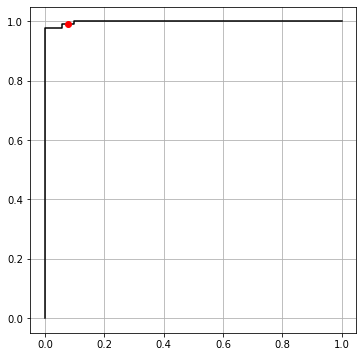

In [51]:
svm = SVC(kernel = 'rbf', gamma = betterG, C = 2).fit(X1n, y1)
y2e = svm.predict(X2n)
y2d = svm.decision_function(X2n)

CM = confusion_matrix(y2, y2e)

f1 = CM[0, 1] / (CM[0, 0] + CM[0, 1])
r1 = CM[1, 1] / (CM[1, 0] + CM[1, 1])

f, r, t = roc_curve(y2, y2d)

plt.figure(figsize=(12, 6))
plt.plot(f, r, 'k-', f1, r1, 'or')
plt.axis('scaled')
plt.grid(True)

### d)

In [56]:
CM_limiar = confusion_matrix(y2, y2d > 0.126)

print("Falsos Negativos: ", CM_limiar[0, 1])
print("Falsos Positivos: ", CM_limiar[1, 0])

Falsos Negativos:  0
Falsos Positivos:  2
